The data here shows the auto insurance details for customers. Goal of this analysis is to identify the potential buying behaviour of customers. Using that we need to identify the increase profitable customer response, retention, and growth.
The profitable customer response will be targetted to the  total claim amount. The dataset contains 9134 customer details with 24 features.

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  linear_model
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

In [106]:
file = pd.read_csv('marketing_customer_analysis.csv')
file

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [107]:
file.columns #Change headers names.

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Data Cleaning:

In [5]:
file = file[['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size']]# Normalize the header

In [108]:
file.info() # There are no missing values in any of the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

If there is no null values though goal of this analysis is profitable bussiness based on the response.So drop all non-responding customers from the dataset.

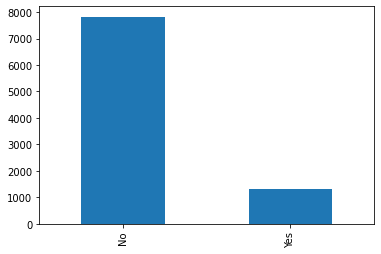

In [109]:
file['Response'].value_counts().plot(kind='bar')
file1 = file[file['Response']== 'Yes']

Based on responded customers the data will be  split  in to numerical and catagorical for the sake convenience.This numerical dataset has 1308 responded customers with their 8 features.

In [110]:
numerical = file1.select_dtypes(include = np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
5,8256.297800,62902,69,14,94,0,2,159.383042
6,5380.898636,55350,67,0,13,0,9,321.600000
8,24127.504020,14072,71,13,3,0,2,511.200000
13,8819.018934,99845,110,23,25,1,8,528.000000
22,24127.504020,14072,71,13,3,0,2,511.200000
...,...,...,...,...,...,...,...,...
9110,34611.378960,20090,109,10,59,0,2,523.200000
9119,5479.555081,56005,68,31,30,1,3,326.400000
9122,25464.820590,13663,97,1,66,0,2,465.600000
9123,5678.050167,0,76,8,44,0,3,364.800000


The splitted catagorical dataset has 16 features.

In [111]:
catagorical=file1.select_dtypes(include=np.object)
catagorical

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
6,XZ87318,Oregon,Yes,Basic,College,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
8,DY87989,Oregon,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Agent,Four-Door Car,Medsize
13,SJ95423,Arizona,Yes,Basic,High School or Below,1/10/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Medsize
22,YH23384,Arizona,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,Suburban,Divorced,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,RA89822,California,Yes,Basic,High School or Below,1/14/11,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Sports Car,Medsize
9119,YX35990,California,Yes,Basic,Master,1/13/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Small
9122,FH43628,California,Yes,Extended,College,2/1/11,Retired,F,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Small
9123,WZ45103,California,Yes,Extended,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Small


 **Processing Data**

For finding Outliers of the numerical data ,the data could be treated in a statistical path.From the description of the numerical dataset,customer lifetime value  and number of open compalints has outstanding diffrence than other features.The outlier of the Sns plot and inter quartile range  are  evidence.Next step is to drop those features from the dataset  otherwise it could be treated differently.

In [112]:
numerical.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,7854.871361,38544.027523,94.142202,14.688073,48.266055,0.362385,2.844037,446.080868
std,6255.638229,28043.637944,36.307194,9.772341,27.071152,0.909959,2.417132,241.906812
min,2004.350666,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,7.345946
25%,3933.813993,18495.000000,68.000000,6.000000,25.000000,0.000000,1.000000,316.800000
50%,5596.257433,32234.000000,85.500000,14.000000,50.000000,0.000000,2.000000,410.120119
75%,9075.768214,60880.000000,109.000000,22.000000,69.000000,0.000000,3.000000,547.200000
max,41787.903430,99845.000000,283.000000,35.000000,99.000000,5.000000,9.000000,1358.400000


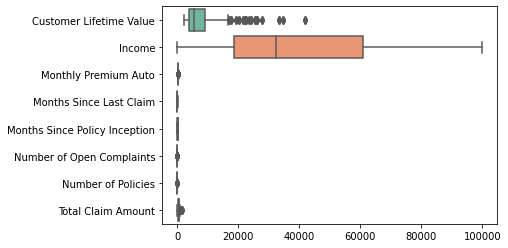

In [113]:
sns.boxplot(data=numerical, orient="h", palette="Set2")

In [114]:
q1 = file.quantile(0.25)
q3 = numerical.quantile(0.75)
iqr = q3-q1
iqr

Customer Lifetime Value           5081.516420
Income                           60880.000000
Monthly Premium Auto                41.000000
Months Since Last Claim             16.000000
Months Since Policy Inception       45.000000
Number of Open Complaints            0.000000
Number of Policies                   2.000000
Total Claim Amount                 274.941756
dtype: float64

In [115]:
(numerical < (q1 - 1.5 * iqr))|(numerical > (q3 + 1.5 * iqr))

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,True,False
8,True,False,False,False,False,False,False,False
13,False,False,False,False,False,True,True,False
22,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9110,True,False,False,False,False,False,False,False
9119,False,False,False,False,False,True,False,False
9122,True,False,False,False,False,False,False,False
9123,False,False,False,False,False,False,False,False


In [116]:
numerical = numerical.drop(['Customer Lifetime Value','Number of Open Complaints'], axis=1)#dropping these two features from this dataset
numerical

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
5,62902,69,14,94,2,159.383042
6,55350,67,0,13,9,321.600000
8,14072,71,13,3,2,511.200000
13,99845,110,23,25,8,528.000000
22,14072,71,13,3,2,511.200000
...,...,...,...,...,...,...
9110,20090,109,10,59,2,523.200000
9119,56005,68,31,30,3,326.400000
9122,13663,97,1,66,2,465.600000
9123,0,76,8,44,3,364.800000


This dataset is coming from a  particular year so extract the month from the dataset, if month would be a reason for the bussiness.

In [117]:
catagorical.describe()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308
unique,1308,5,1,3,5,57,5,2,3,3,3,9,3,4,6,3
top,KE63160,California,Yes,Basic,College,1/26/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer2,Agent,Four-Door Car,Medsize
freq,1,456,1308,798,408,54,756,660,1008,696,958,468,684,666,624,942


In [118]:
catagorical['month'] = pd.DatetimeIndex(catagorical['Effective To Date']).month 
catagorical['month'] = pd.to_numeric(catagorical['month'], errors='coerce')
catagorical['month']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


5       1
6       2
8       1
13      1
22      1
       ..
9110    1
9119    1
9122    2
9123    1
9130    2
Name: month, Length: 1308, dtype: int64

(1308, 16)

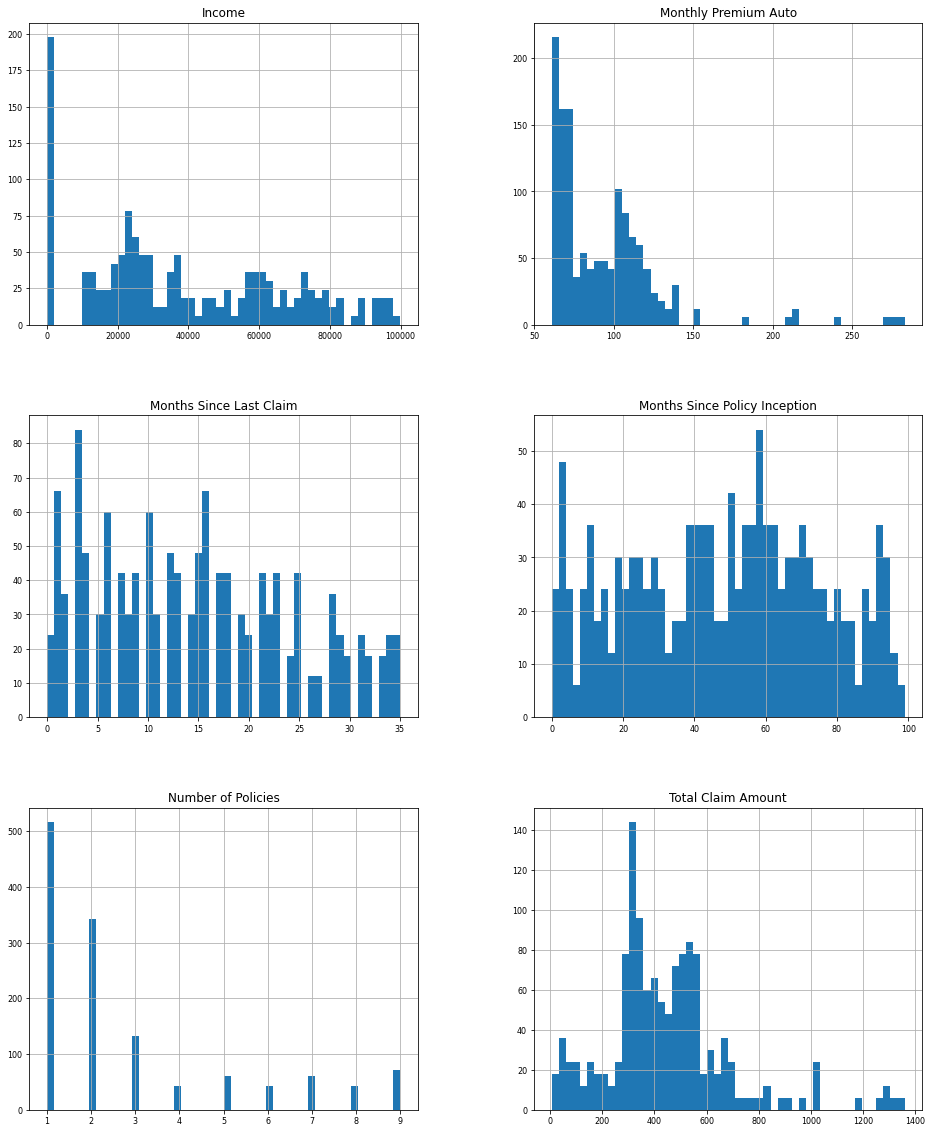

In [119]:
numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()# None of the features in the numerical data are  normal, some of the features are right skewed so transform the date in to another form.

Catagorical should be transform to numerical for the prediction model.

In [120]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(catagorical)
print(encoder.categories_)
encoded = encoder.transform(catagorical).toarray()
print(encoded)
onehot_encoded = pd.DataFrame(encoded)#columns=encoder.categories_)
onehot_encoded.head()


[array(['AA16582', 'AA35519', 'AA56476', ..., 'ZX93551', 'ZZ22047',
       'ZZ49347'], dtype=object), array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
       '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
       '1/20/11', '1/21/11', '1/23/11', '1/24/11', '1/25/11', '1/26/11',
       '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11', '1/31/11',
       '1/5/11', '1/6/11', '1/7/11', '1/8/11', '1/9/11', '2/1/11',
       '2/10/11', '2/11/11', '2/12/11', '2/13/11', '2/14/11', '2/15/11',
       '2/16/11', '2/17/11', '2/18/11', '2/19/11', '2/2/11', '2/20/11',
       '2/21/11', '2/22/11', '2/23/11', '2/24/11', '2/25/11', '2/26/11',
       '2/27/11', '2/28/11', '2/3/11', '2/4/11', '2/5/1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [121]:
onehot_encoded.head

<bound method NDFrame.head of       0     1     2     3     4     5     ...  1399  1400  1401  1402  1403  1404
0      0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   1.0   1.0   0.0   0.0
1      0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   1.0   0.0   1.0
2      0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   1.0   0.0   0.0
3      0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   0.0   0.0   1.0   0.0   0.0
4      0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   1.0   0.0   0.0
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
1303   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   1.0   0.0   1.0   0.0   0.0
1304   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0
1305   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   1.0
1306   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   1.0   0.0
1307   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   1.

In [122]:
from sklearn.preprocessing import LabelEncoder
label_encoded1 = LabelEncoder().fit(catagorical['State']).transform(catagorical['State'])
label_encoded1 = pd.DataFrame(label_encoded1, columns=['State'])
label_encoded2 = LabelEncoder().fit(catagorical['Coverage']).transform(catagorical['Coverage']) # ordered wrt value counts
label_encoded2 = pd.DataFrame(label_encoded2, columns=['Coverage'])
label_encoded3 = LabelEncoder().fit(catagorical['month']).transform(catagorical['month'])
label_encoded3 = pd.DataFrame(label_encoded3, columns=['month'])
label_encoded4 = LabelEncoder().fit(catagorical['Policy Type']).transform(catagorical['Policy Type'])
label_encoded4 = pd.DataFrame(label_encoded4, columns=['Policy Type'])
label_encoded5 = LabelEncoder().fit(catagorical['EmploymentStatus']).transform(catagorical['EmploymentStatus'])
label_encoded5 = pd.DataFrame(label_encoded5, columns=['EmploymentStatus'])
label_encoded6 = LabelEncoder().fit(catagorical['Renew Offer Type']).transform(catagorical['Renew Offer Type'])
label_encoded6 = pd.DataFrame(label_encoded6, columns=['Renew Offer Type'])
print(label_encoded1)
print(label_encoded2)
print(label_encoded3)
print(label_encoded4)
print(label_encoded5)
print(label_encoded6)

      State
0         3
1         3
2         3
3         0
4         0
...     ...
1303      1
1304      1
1305      1
1306      1
1307      1

[1308 rows x 1 columns]
      Coverage
0            0
1            0
2            0
3            0
4            0
...        ...
1303         0
1304         0
1305         1
1306         1
1307         1

[1308 rows x 1 columns]
      month
0         0
1         1
2         0
3         0
4         0
...     ...
1303      0
1304      0
1305      1
1306      0
1307      1

[1308 rows x 1 columns]
      Policy Type
0               1
1               0
2               0
3               0
4               1
...           ...
1303            1
1304            0
1305            1
1306            1
1307            0

[1308 rows x 1 columns]
      EmploymentStatus
0                    1
1                    1
2                    2
3                    1
4                    2
...                ...
1303                 1
1304                 1
1305     

Numerical data transformed in to smaller scale and  how the data correlated each other by correllation matrix.Here all the features are correlated but not high correlation.No feature shows greater than 0.9 it means that dropping impossible in this case.The next step is to make a prediction model by linear regression.For prdiction the whole model split in to test and train.

In [123]:
transformer = MinMaxScaler().fit(numerical)
numerical_normalized = transformer.transform(numerical)
print(numerical_normalized.shape)
numerical_normalized=pd.DataFrame(numerical_normalized, columns=numerical.columns)

(1308, 6)


In [124]:
numerical_normalized

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount
0,0.629996,0.036036,0.400000,0.949495,0.125,0.112532
1,0.554359,0.027027,0.000000,0.131313,1.000,0.232599
2,0.140938,0.045045,0.371429,0.030303,0.125,0.372934
3,1.000000,0.220721,0.657143,0.252525,0.875,0.385369
4,0.140938,0.045045,0.371429,0.030303,0.125,0.372934
...,...,...,...,...,...,...
1303,0.201212,0.216216,0.285714,0.595960,0.125,0.381816
1304,0.560919,0.031532,0.885714,0.303030,0.250,0.236152
1305,0.136842,0.162162,0.028571,0.666667,0.125,0.339183
1306,0.000000,0.067568,0.228571,0.444444,0.250,0.264574


In [125]:
num = pd.concat([numerical_normalized,label_encoded1,label_encoded2,label_encoded3,label_encoded4,label_encoded5,label_encoded6], axis=1)


In [144]:
num.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State,Coverage,month,Policy Type,EmploymentStatus,Renew Offer Type
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,0.386039,0.149289,0.419659,0.487536,0.230505,0.324735,1.733945,0.481651,0.422018,0.827217,1.770642,0.568807
std,0.280872,0.163546,0.279210,0.273446,0.302142,0.179050,1.281799,0.658393,0.494070,0.487762,1.228080,0.539778
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185237,0.031532,0.171429,0.252525,0.000000,0.229046,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.322840,0.110360,0.400000,0.505051,0.125000,0.298118,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.609745,0.216216,0.628571,0.696970,0.250000,0.399580,3.000000,1.000000,1.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,4.000000,2.000000


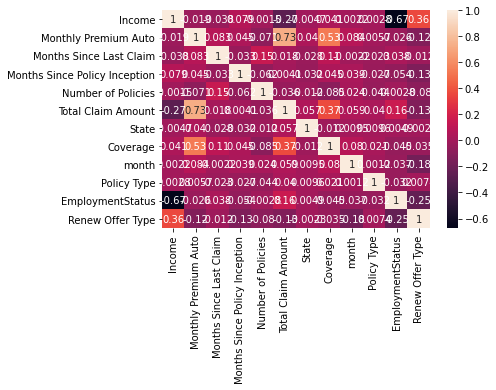

In [127]:
correllation_matrix = num.corr()
sns.heatmap(correllation_matrix,annot=True)
plt.show()

In [128]:
correllation_matrix 

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Total Claim Amount,State,Coverage,month,Policy Type,EmploymentStatus,Renew Offer Type
Income,1.000000,-0.018676,-0.037536,0.079148,-0.001533,-0.272403,-0.004651,0.040701,0.002186,0.002815,-0.671468,0.362512
Monthly Premium Auto,-0.018676,1.000000,0.082945,0.045262,-0.071307,0.730515,0.040270,0.532740,0.084175,0.005709,-0.025831,-0.118676
Months Since Last Claim,-0.037536,0.082945,1.000000,-0.032761,0.145448,0.018464,-0.028314,0.109702,-0.002189,-0.022712,0.038024,-0.012463
Months Since Policy Inception,0.079148,0.045262,-0.032761,1.000000,-0.062226,0.004085,-0.032047,0.044575,0.038964,-0.026589,-0.054363,-0.130689
Number of Policies,-0.001533,-0.071307,0.145448,-0.062226,1.000000,-0.035622,-0.012168,-0.085454,0.024404,-0.044290,-0.002781,-0.079732
Total Claim Amount,-0.272403,0.730515,0.018464,0.004085,-0.035622,1.000000,0.056925,0.371484,0.058935,0.040043,0.160091,-0.126170
State,-0.004651,0.040270,-0.028314,-0.032047,-0.012168,0.056925,1.000000,-0.012135,0.009499,0.009633,0.004950,-0.002273
Coverage,0.040701,0.532740,0.109702,0.044575,-0.085454,0.371484,-0.012135,1.000000,0.080273,0.021093,-0.044952,-0.035197
month,0.002186,0.084175,-0.002189,0.038964,0.024404,0.058935,0.009499,0.080273,1.000000,0.001194,-0.037066,-0.177821
Policy Type,0.002815,0.005709,-0.022712,-0.026589,-0.044290,0.040043,0.009633,0.021093,0.001194,1.000000,-0.031721,0.007412


In [129]:
y = num['Total Claim Amount']
X = num.drop(['Total Claim Amount'], axis=1)


In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [131]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1046, 11)
(262, 11)
(1046,)
(262,)


In [132]:
X_train.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State,Coverage,month,Policy Type,EmploymentStatus,Renew Offer Type
16,0.000000,0.040541,0.685714,0.101010,0.000,1,0,0,1,4,0
538,0.251730,0.027027,0.085714,0.000000,0.625,1,0,0,1,1,1
532,0.768501,0.013514,0.057143,0.686869,0.000,1,0,1,1,1,1
285,0.374420,0.171171,0.257143,0.171717,0.000,0,1,0,1,1,1
365,0.130572,0.283784,0.800000,0.494949,0.000,3,1,0,1,2,1


In [133]:

X_test.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,State,Coverage,month,Policy Type,EmploymentStatus,Renew Offer Type
173,0.351495,0.054054,0.714286,0.565657,0.125,3,0,0,1,1,1
843,0.313266,0.139640,0.685714,0.959596,0.000,3,1,1,1,1,0
996,0.605689,0.207207,0.257143,0.181818,0.000,3,2,1,1,1,1
992,0.000000,0.256757,0.400000,0.646465,0.375,0,0,1,1,4,0
12,0.231268,0.157658,0.800000,0.909091,0.500,1,1,0,1,3,0


In [134]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
from sklearn.metrics import r2_score

predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.591885121072403

In [136]:
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.012276516540351707


In [138]:
import math

In [139]:
rmse = math.sqrt(mse)
print(rmse)

0.11079944287022253


In [140]:
r2 = r2_score(y_test, predictions)
r2

0.591885121072403

In [141]:
from sklearn.metrics import mean_absolute_error

In [142]:
mae = mean_absolute_error(y_test, predictions)
mae

0.07471204828986425

You can see that the value of root mean squared error is 0.1107, which is slightly less than 25% of the our numerical data. This means that our algorithm was  very accurate but can still make reasonably good predictions.